In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("finance_economics_dataset.csv", encoding = 'latin - 1')

1. What is the shape of the dataset?

In [5]:
df.shape

(3000, 24)

2. What are the column names and their data types?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Date                                   3000 non-null   object 
 1   Stock Index                            3000 non-null   object 
 2   Open Price                             3000 non-null   float64
 3   Close Price                            3000 non-null   float64
 4   Daily High                             3000 non-null   float64
 5   Daily Low                              3000 non-null   float64
 6   Trading Volume                         3000 non-null   int64  
 7   GDP Growth (%)                         3000 non-null   float64
 8   Inflation Rate (%)                     3000 non-null   float64
 9   Unemployment Rate (%)                  3000 non-null   float64
 10  Interest Rate (%)                      3000 non-null   float64
 11  Cons

3. How many unique stock indices are there?


In [7]:
df['Stock Index'].nunique()

3

4. What is the date range of the dataset?


In [8]:
start_date = df['Date'].min()
end_date = df['Date'].max()
print(f"Date range: {start_date} to {end_date}")

Date range: 2000-01-01 to 2008-03-18


5. Are there any missing values?


In [9]:
df.isnull().sum()

Date                                     0
Stock Index                              0
Open Price                               0
Close Price                              0
Daily High                               0
Daily Low                                0
Trading Volume                           0
GDP Growth (%)                           0
Inflation Rate (%)                       0
Unemployment Rate (%)                    0
Interest Rate (%)                        0
Consumer Confidence Index                0
Government Debt (Billion USD)            0
Corporate Profits (Billion USD)          0
Forex USD/EUR                            0
Forex USD/JPY                            0
Crude Oil Price (USD per Barrel)         0
Gold Price (USD per Ounce)               0
Real Estate Index                        0
Retail Sales (Billion USD)               0
Bankruptcy Rate (%)                      0
Mergers & Acquisitions Deals             0
Venture Capital Funding (Billion USD)    0
Consumer Sp

6. Are there negative values in columns that should be non-negative?


In [12]:
non_negative_cols = ['Open Price', 'Close Price', 'Daily High', 'Daily Low', 
                     'Trading Volume', 'Gold Price (USD per Ounce)', 
                     'Crude Oil Price (USD per Barrel)', 
                     'Corporate Profits (Billion USD)', 
                     'Government Debt (Billion USD)', 
                     'Real Estate Index', 'Retail Sales (Billion USD)', 
                     'Venture Capital Funding (Billion USD)', 
                     'Consumer Spending (Billion USD)']

(df[non_negative_cols] < 0).sum()

Open Price                               0
Close Price                              0
Daily High                               0
Daily Low                                0
Trading Volume                           0
Gold Price (USD per Ounce)               0
Crude Oil Price (USD per Barrel)         0
Corporate Profits (Billion USD)          0
Government Debt (Billion USD)            0
Real Estate Index                        0
Retail Sales (Billion USD)               0
Venture Capital Funding (Billion USD)    0
Consumer Spending (Billion USD)          0
dtype: int64

7. What is the summary of GDP Growth (%)?

In [13]:
df['GDP Growth (%)'].describe()

count    3000.000000
mean        2.608903
std         4.287337
min        -5.000000
25%        -1.012500
50%         2.725000
75%         6.242500
max        10.000000
Name: GDP Growth (%), dtype: float64

8. Are there rows with zero or near-zero trading volume?

In [22]:
print((df['Trading Volume'] <= 0).sum())

0


9. Are there any duplicate rows?

In [21]:
print(df.duplicated().sum())

0


10. Are there outliers in GDP, Gold, or Oil prices?

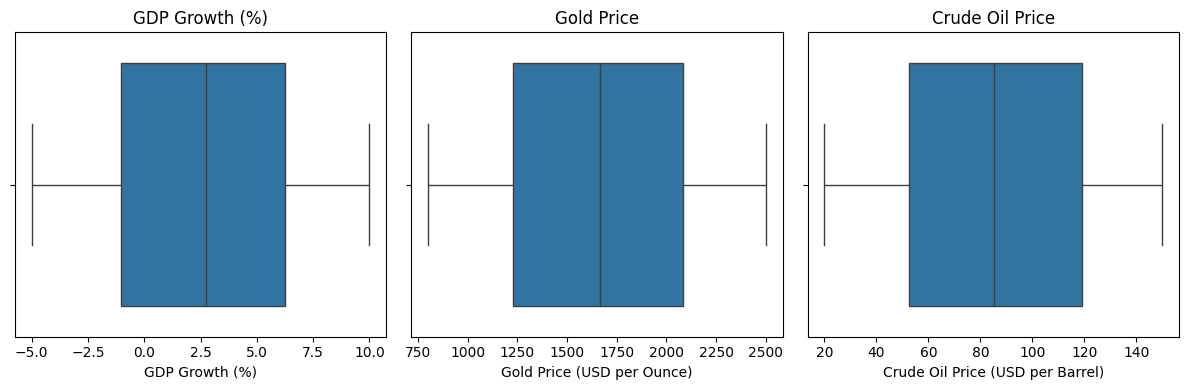

In [17]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.boxplot(x=df['GDP Growth (%)'])
plt.title('GDP Growth (%)')

plt.subplot(1,3,2)
sns.boxplot(x=df['Gold Price (USD per Ounce)'])
plt.title('Gold Price')

plt.subplot(1,3,3)
sns.boxplot(x=df['Crude Oil Price (USD per Barrel)'])
plt.title('Crude Oil Price')

plt.tight_layout()
plt.show()

11. What is the summary of Inflation Rate (%)?

In [18]:
df['Inflation Rate (%)'].describe()

count    3000.000000
mean        5.096830
std         2.910513
min         0.010000
25%         2.607500
50%         5.110000
75%         7.600000
max        10.000000
Name: Inflation Rate (%), dtype: float64

12. What is the average unemployment rate?

In [20]:
print(df['Unemployment Rate (%)'].mean())

8.663786666666667


13. Which index has the highest trading volume?

In [23]:
print(df.groupby('Stock Index')['Trading Volume'].mean().sort_values(ascending=False).head(1))

Stock Index
S&P 500    5.145193e+08
Name: Trading Volume, dtype: float64


14. How many stock records are from each index?

In [24]:
print(df['Stock Index'].value_counts())

Stock Index
S&P 500      1036
NASDAQ       1007
Dow Jones     957
Name: count, dtype: int64


15. What is the correlation between inflation and interest rate?

In [25]:
print(df[['Inflation Rate (%)', 'Interest Rate (%)']].corr())

                    Inflation Rate (%)  Interest Rate (%)
Inflation Rate (%)            1.000000           0.005733
Interest Rate (%)             0.005733           1.000000


16. What is the average Consumer Confidence Index?

In [26]:
print(df['Consumer Confidence Index'].mean())

85.036


17. Which column has the highest standard deviation?

In [27]:
print(df.std(numeric_only=True).sort_values(ascending=False).head(1))

Trading Volume    2.859004e+08
dtype: float64


18. What is the highest gold price recorded?

In [28]:
print(df['Gold Price (USD per Ounce)'].max())

2499.66


19. Which date had the highest crude oil price?

In [29]:
df.loc[df['Crude Oil Price (USD per Barrel)'].idxmax(), ['Date', 'Crude Oil Price (USD per Barrel)']]

Date                                2001-11-22
Crude Oil Price (USD per Barrel)        149.87
Name: 691, dtype: object

20. What is the average corporate profit?

In [31]:
print(df['Corporate Profits (Billion USD)'].mean())

2553.7563333333333
